In [43]:
## Temporao Coherence Improvement after proper configuration of network inversion.

import os
import matplotlib.pyplot as plt
from pysar.objects import sensor
from pysar.utils import readfile, plot as pp
from pysar.simulation.plot import *

work_dir = '~/insarlab/PYSAR_EXAMPLE/SierraNegraAlosAT133/PYSAR/NET_INV'
work_dir = os.path.expanduser(work_dir)
os.chdir(work_dir)
print('Go to directory: '+work_dir)
proj_name = sensor.project_name2sensor_name(work_dir)[1]

# read data
metadata = readfile.read_attribute('../velocity.h5')
tcoh = []
tcoh.append(readfile.read('temporalCoherence_allNet_noWeight.h5')[0])
tcoh.append(readfile.read('temporalCoherence_cohNet_varWeight.h5')[0])

Go to directory: /Users/yunjunz/insarlab/PYSAR_EXAMPLE/SierraNegraAlosAT133/PYSAR/NET_INV


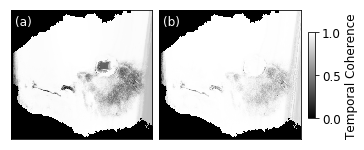

In [46]:
# plot
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[5, 3])
for i, axi in enumerate(ax):
    im = axi.imshow(tcoh[i], vmin=0., vmax=1., cmap='gray')
    axi = pp.auto_flip_direction(metadata, ax=axi, print_msg=False)
    axi.get_xaxis().set_ticks([])
    axi.get_yaxis().set_ticks([])
fig.subplots_adjust(wspace=0.05, right=0.93)

# colorbar
cax = fig.add_axes([0.95, 0.3, 0.02, 0.4])
cbar = plt.colorbar(im, cax=cax, ticks=[0, 0.5, 1])
cbar.ax.tick_params(which='both', direction='out', labelsize=font_size)
cbar.set_label('Temporal Coherence', fontsize=font_size)

# number
ax[0].annotate('(a)', xy=(0.03, 0.88), color='w', xycoords='axes fraction', fontsize=font_size)
ax[1].annotate('(b)', xy=(0.03, 0.88), color='w', xycoords='axes fraction', fontsize=font_size)

plt.savefig('{}_tempCoh_compare.jpg'.format(proj_name), bbox_inches='tight', transparent=True, dpi=fig_dpi)
plt.show()